In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/blobs_1.csv")

In [3]:
def _closest_cluster_centers(sample, cluster_centers):
    """Returns the index of closest centroid (cluster centers) of the sample.
    
    Parametes
    ---------
    sample : array-like of shape (1, n_features)
    
    cluster_centers : {array-like} of shape (n_clusters, n_features)
    
    Returns
    --------
    closest_ind : int
        Index of closest centroid.
    """
    closest_i = 0
    closest_dist = float('inf')
    
    for i, cluster_center in enumerate(cluster_centers):
        # calculate distance
        distance_i = np.linalg.norm(sample - cluster_center[i])
        
        # Check for the minimal distance
        if distance_i < closest_dist:
            closest_dist = distance_i
            closest_i = i
        
    return closest_i

In [3]:
from gaussian_mixture import GaussianMixture
from sklearn.decomposition import PCA

In [4]:
array_df = np.asarray(df.copy())

pca = PCA(n_components=2, random_state=42)

clean_df = pca.fit_transform(array_df)

In [12]:
gm = GaussianMixture(n_components=3, init_params='k-means++', random_state=42)

In [13]:
y_gmix = gm.fit_predict(clean_df)

In [14]:
gm.bic(clean_df)

3136.2007672743707

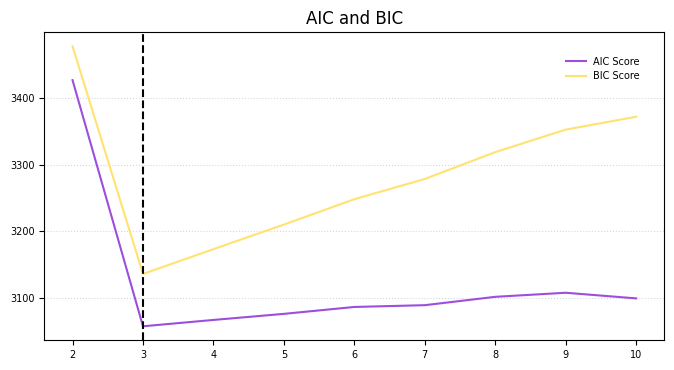

In [10]:
aic = []
bic = []


for i in range(2,11):
    gm = GaussianMixture(n_components=i, init_params='k-means++', random_state=42)
    gm.fit(clean_df)
    aic.append([i, gm.aic(clean_df)])
    bic.append([i, gm.bic(clean_df)])

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot([list[0] for list in aic], [list[1] for list in aic], color='#9D4EDD', label='AIC Score')
ax.plot([list[0] for list in bic], [list[1] for list in bic], color='#FFE270', label='BIC Score')
ax.legend(loc='upper right', borderpad=2, frameon=False, fontsize=7)
ax.set_title('AIC and BIC')
ax.tick_params(labelsize=7)
ax.grid(axis='x', alpha=0)
ax.grid(axis='y', alpha=0.5, linestyle='dotted')
ax.axvline(x=3, linestyle='dashed', color='k')

plt.show()



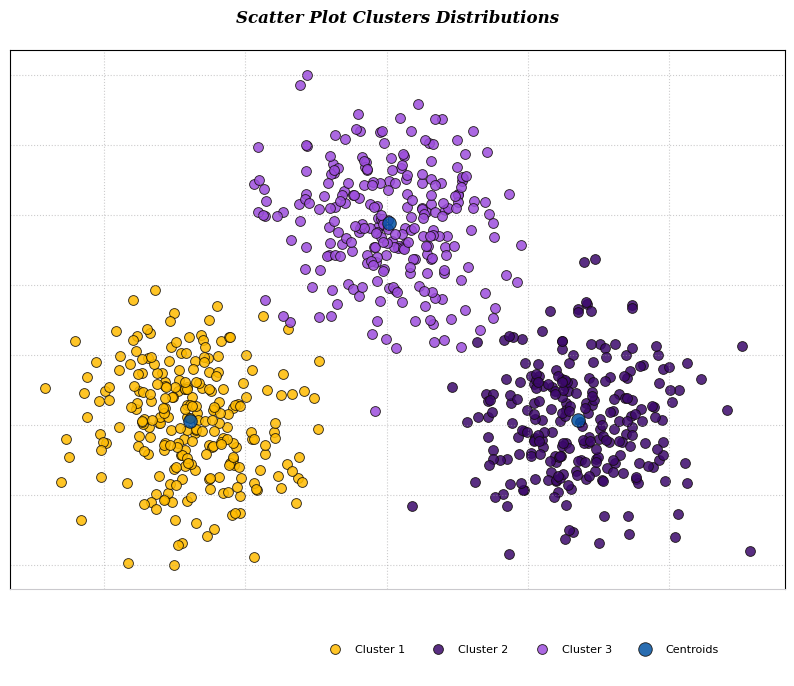

In [16]:
import matplotlib.pyplot as plt

cluster_colors=['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Centroids']
title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
text_style=dict(fontweight='bold', fontfamily='serif')
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
legend_style=dict(borderpad=2, frameon=False, fontsize=8)

y_means_label = list(set(y_gmix))

fig, ax = plt.subplots(figsize=(10, 7))
for i in y_means_label:
    ax.scatter(clean_df[y_gmix==i, 0], clean_df[y_gmix==i, 1], s=50, c=cluster_colors[i], **scatter_style)
ax.scatter(gm.means_[:,0], gm.means_[:,1], s=95, c="#0353A4", label='centroids', **scatter_style)
ax.set_title('Scatter Plot Clusters Distributions\n', **title)
ax.legend(labels, bbox_to_anchor=(0.95, -0.05), ncol=5, **legend_style)
ax.grid(axis='both', alpha=0.5, color='#9B9A9C', linestyle='dotted')
ax.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('#CAC9CD')